When we try to study the frequency content of a signal, [FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform) is always the tool we use. Also, a lot of times, you hear others talking about 'we applied a XX taper before we conduct the FFT'. Why we need a taper before FFT? This week, we will talk about what is a taper, and why we need it. Let's first look at an example below:

In [1]:
import numpy as np
from scipy import fft, arange
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline
plt.style.use('seaborn-poster')

In [2]:
def plotSpectrum(t, y,Fs):
    """
    Function to plot the time domain and frequency domain signal
    """
    n = len(y) # length of the signal
    k = arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(n/2)] # one side frequency range

    Y = fft(y)/n # fft computing and normalization
    Y = Y[range(n/2)]    
    
    # plot time domain and frequency domain signal
    plt.subplot(2,1,1)
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(2,1,2)
    plt.stem(frq,abs(Y),'r')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.tight_layout()
    plt.show()

## Example 1 (5 Hz sine wave)

Let's create a 5 Hz sine signal with a sampling rate 100 Hz (this is saying within 1 second, we have 100 data points to represent this sine signal). We can see the time domain signal in the following top figure with 5 cycles within 1 second. The bottom figure shows the FFT spectrum amplitude, and we see a very clear 5 Hz signal. So far so good, and it all looks normal. 

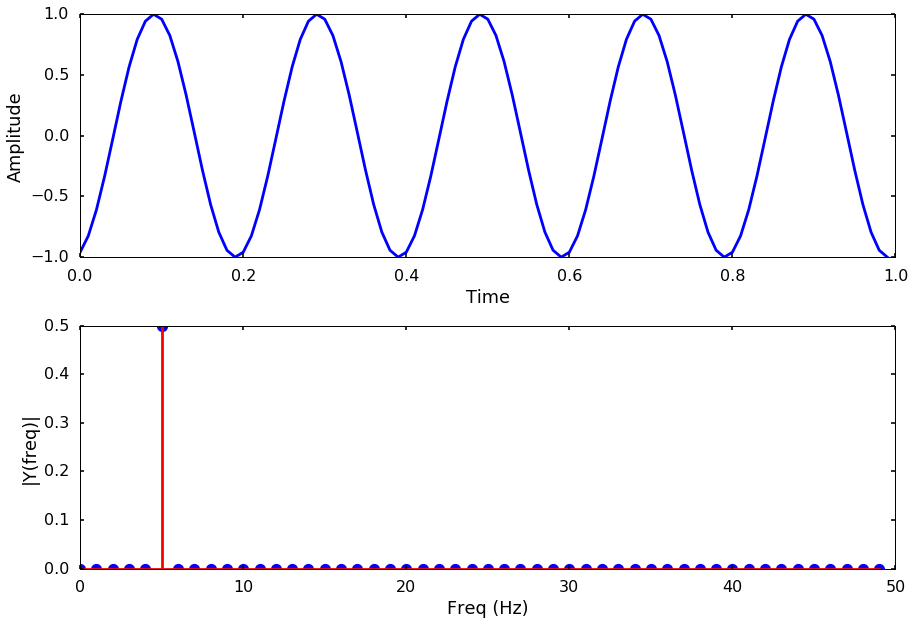

In [3]:
Fs = 100.0  # sampling rate
Ts = 1.0/Fs # sampling interval
t = arange(0,1,Ts) # time vector
ff = 5;   # frequency of the signal
# create the signal
y = np.sin(2*np.pi*ff*t + 5)

plotSpectrum(t, y,Fs)

## Example 2 (same 5 Hz sine wave, but a little longer)  

Using the same signal as the above, we just shrink the signal from 1 sec to 0.5 sec, as the top figure shows. But when we look at the FFT spectrum, somehow we are not getting the clear 5 Hz signal anymore. Instead, we have a large peak at 5 Hz, but also small peaks at other frequencies. What happened? We are pretty sure that the signal is a 5 Hz signal, where other frequency content comes from?

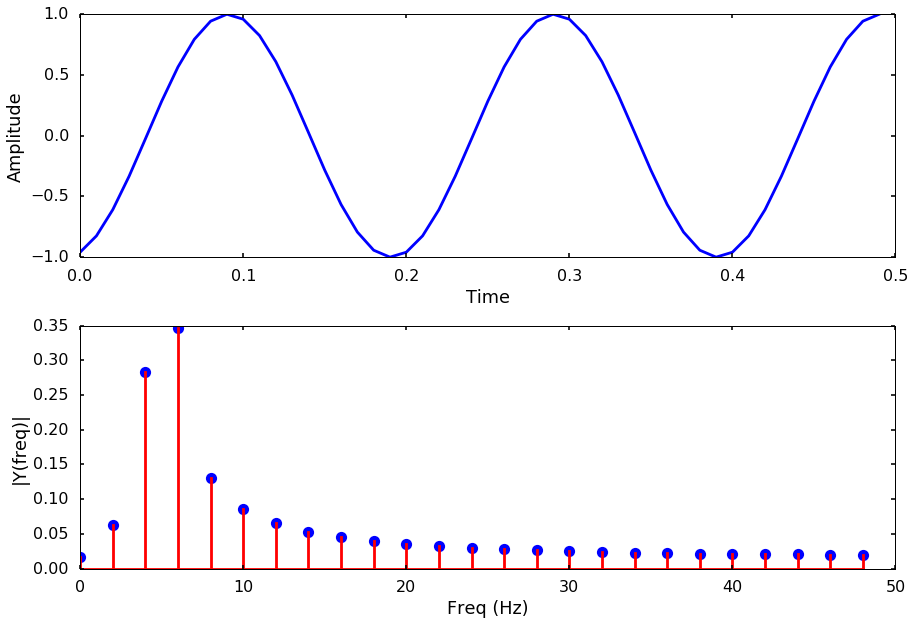

In [4]:
# let's extend the signal from 1s to 0.5s
t = arange(0,0.5,Ts)

# make sure we are still using 5 Hz as the frequency of the signal
ff = 5;
y = np.sin(2*np.pi*ff*t + 5)
plotSpectrum(t, y,Fs)

## Why this happens  

Well, if we look at the first example and second example more carefully, we will notice the difference: the start and end point of the signal in example 1 are all -1. But in the second example, the start point is -1, and the end point is 1. Is this the cause of the problem? Yes! When we conduct FFT on a finite length signal, we actually assume the signal repeat itself to a infinite length signal and connecting the end point with the start point (you can also think the signal is has a period of whole length). But in the second example, when we connect the signal, there is a discontinuity as the following figure shows. This kind of discontinuity in the signal usually introduces other frequency signals, and smear the true spectrum by spreading the peak to the surrounding frequencies. It is like the energy leak to other frequencies, so people call it [spectrum leakage](https://en.wikipedia.org/wiki/Spectral_leakage). 

![Figure](./Why_we_need_taper_when_do_fft_files/discontinuity.png "discontinuity")

## How can we reduce the leakage  

This is where the [taper or window function](https://en.wikipedia.org/wiki/Window_function) comes in. We can multiply a smooth window function to make the connecting points smoother, usually this window function is also called taper. A typical taper usually has a gradual decreasing of amplitude to zero towards the edge. For example, if we plot a cosine taper in the time and frequency domain, it will look like the following figure. 

### Cosine taper

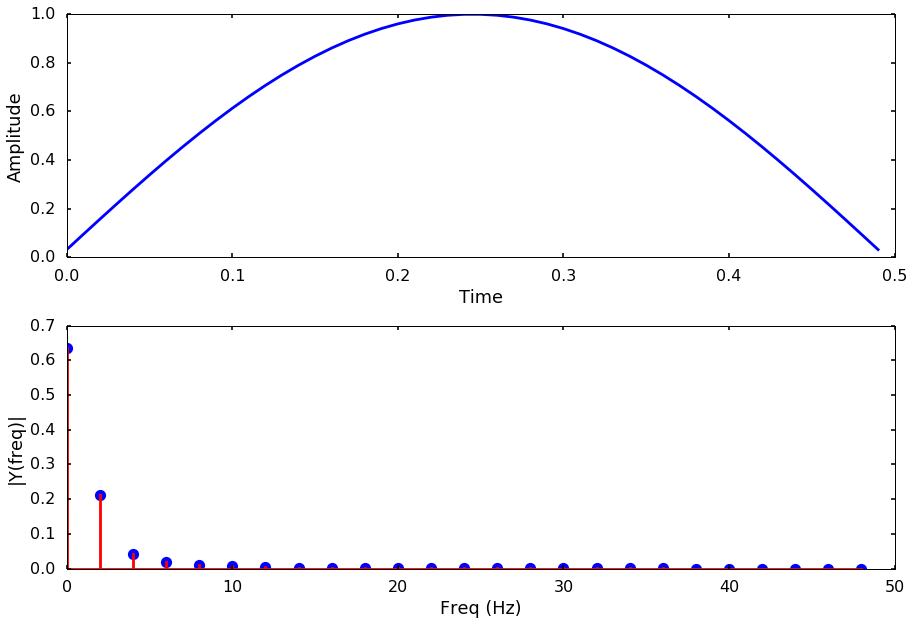

In [5]:
n = len(t) # number of points
window = signal.cosine(n)
plotSpectrum(t, window,Fs)

### Apply the taper
This windowing process consists of multiplying the time record by a finite-length window with an amplitude that varies smoothly and gradually toward zero at the edges. Let's apply the cosine taper to the signal, and we can see the signal now has 0 at both the start and end point. The FFT spectrum has less leakage than before. 

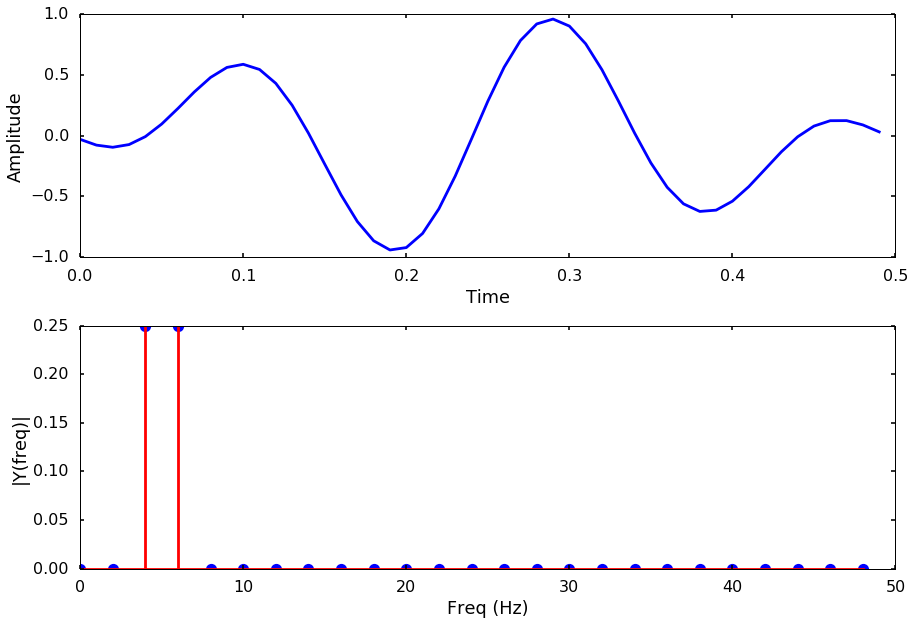

In [6]:
# apply the taper to the signal
y_tapered = window * y 
plotSpectrum(t, y_tapered,Fs)

## Try different window

There are many different types of window function, how to choose them depends on your need or your problem at hand. In the following, I will plot some common window functions, you can get a sense of what they look like. 

### Blackman

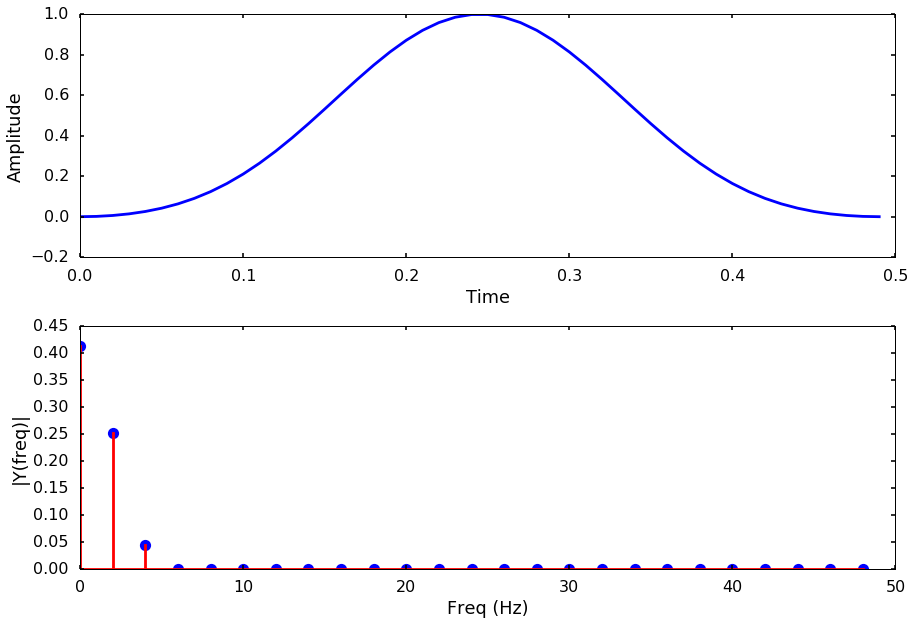

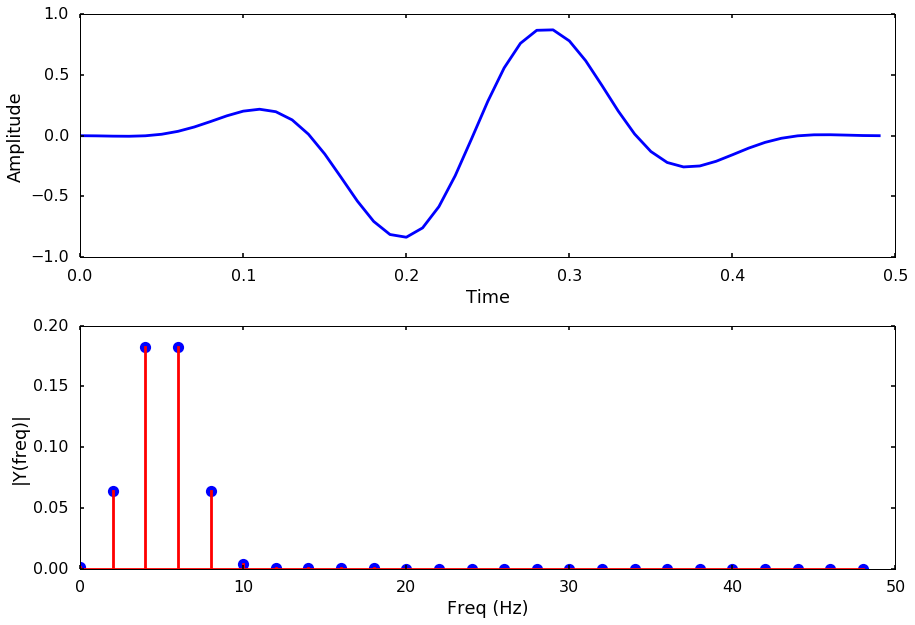

In [7]:
window = signal.blackman(n)
plotSpectrum(t, window,Fs)

y_tapered = window * y 
plotSpectrum(t, y_tapered,Fs)

### Hanning

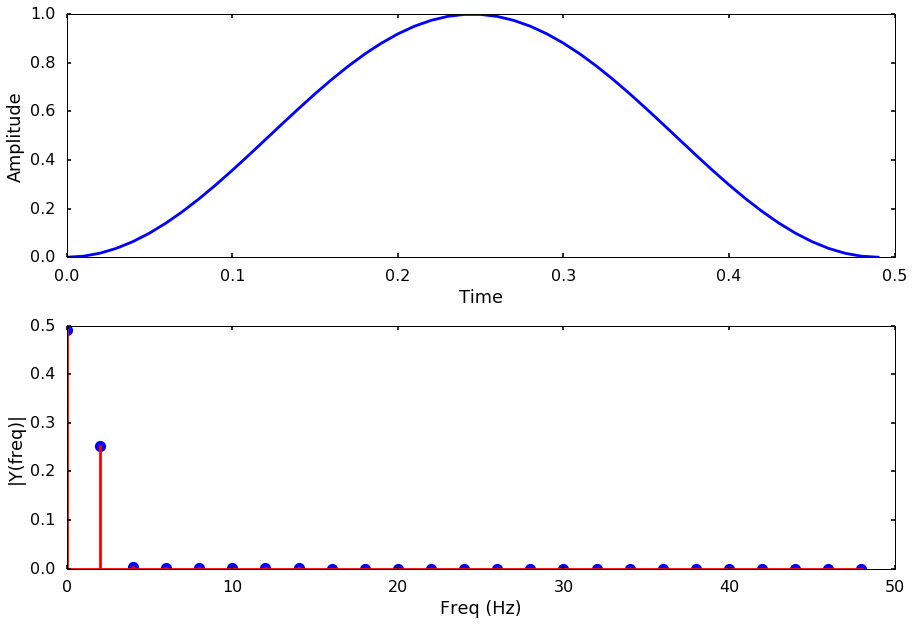

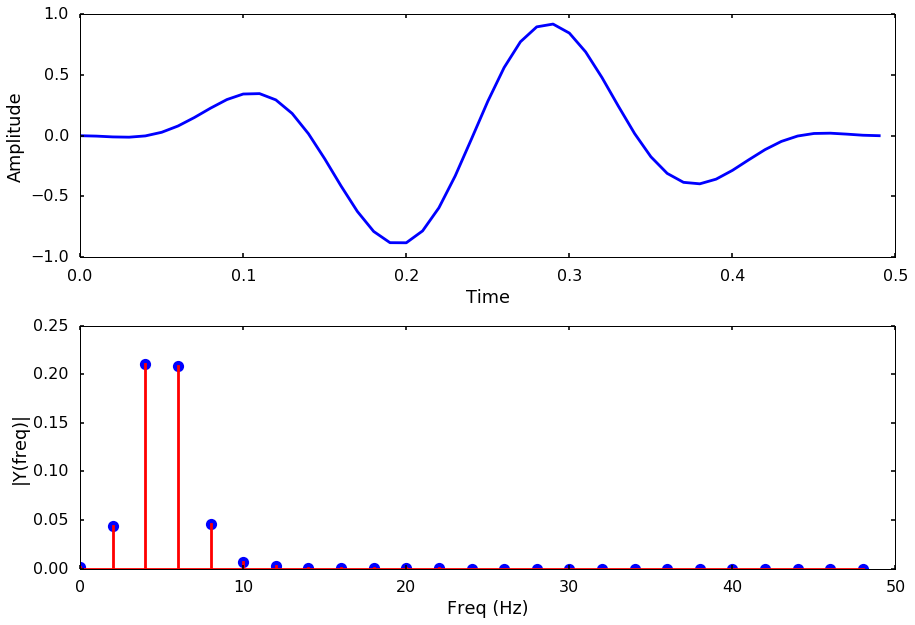

In [8]:
window = signal.hanning(n)
plotSpectrum(t, window,Fs)

y_tapered = window * y 
plotSpectrum(t, y_tapered,Fs)

## flattop

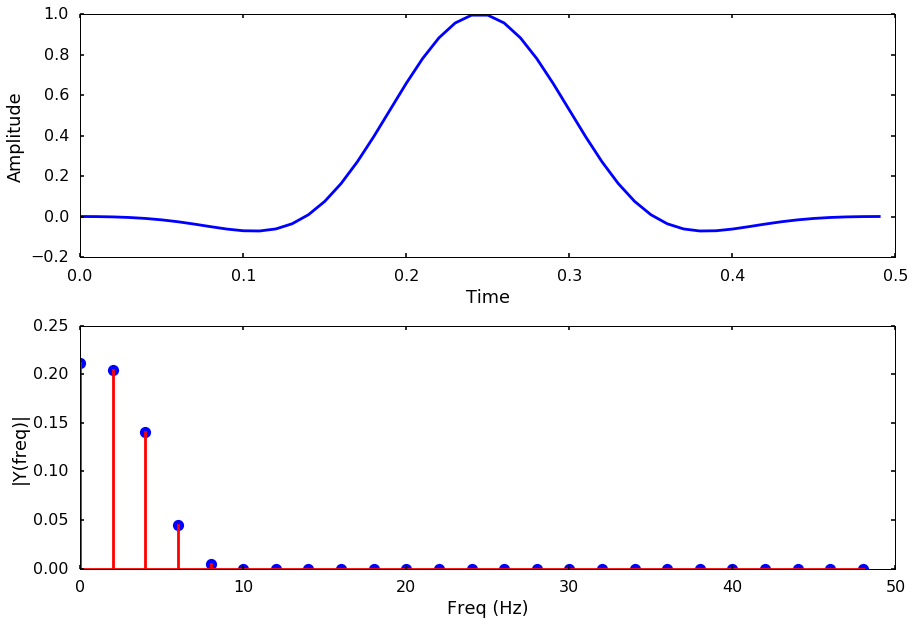

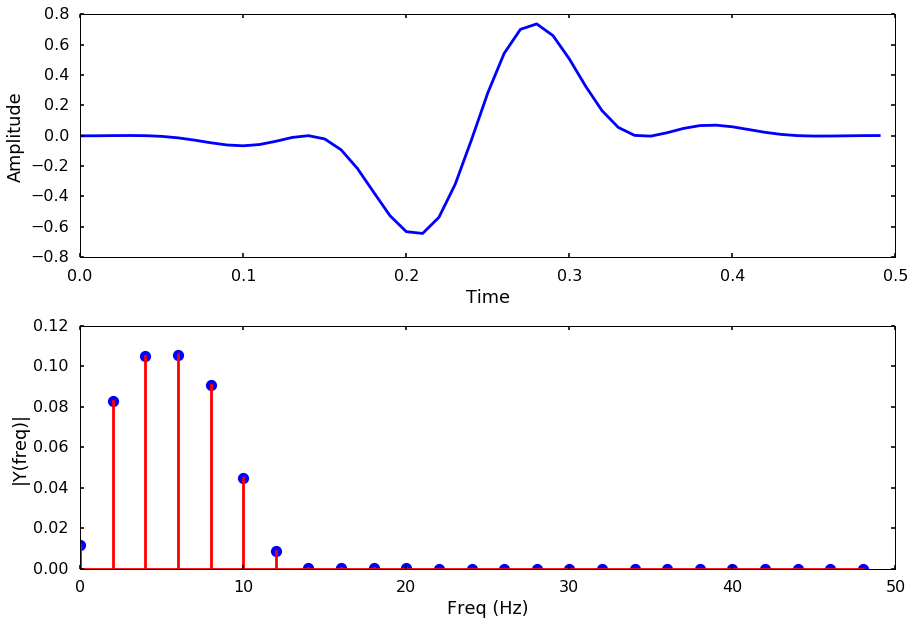

In [9]:
window = signal.flattop(n)
plotSpectrum(t, window,Fs)

y_tapered = window * y 
plotSpectrum(t, y_tapered,Fs)

### Tukey

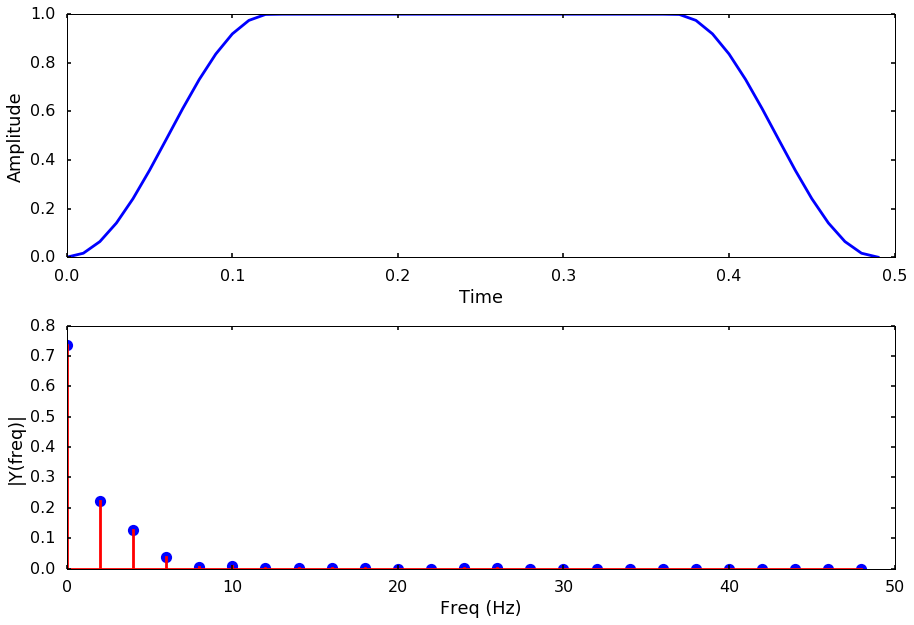

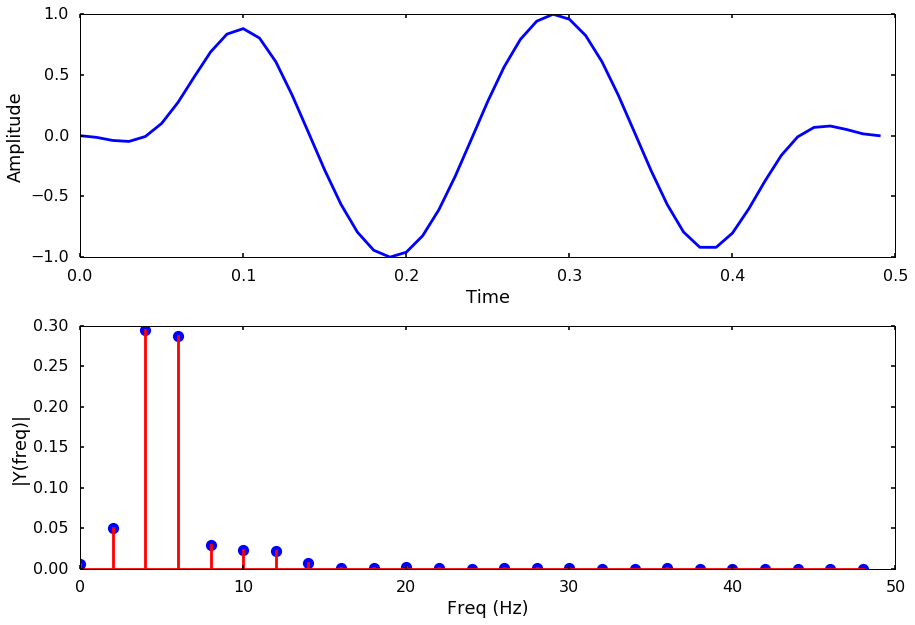

In [10]:
window = signal.tukey(n)
plotSpectrum(t, window,Fs)

y_tapered = window * y 
plotSpectrum(t, y_tapered,Fs)

### Parzen

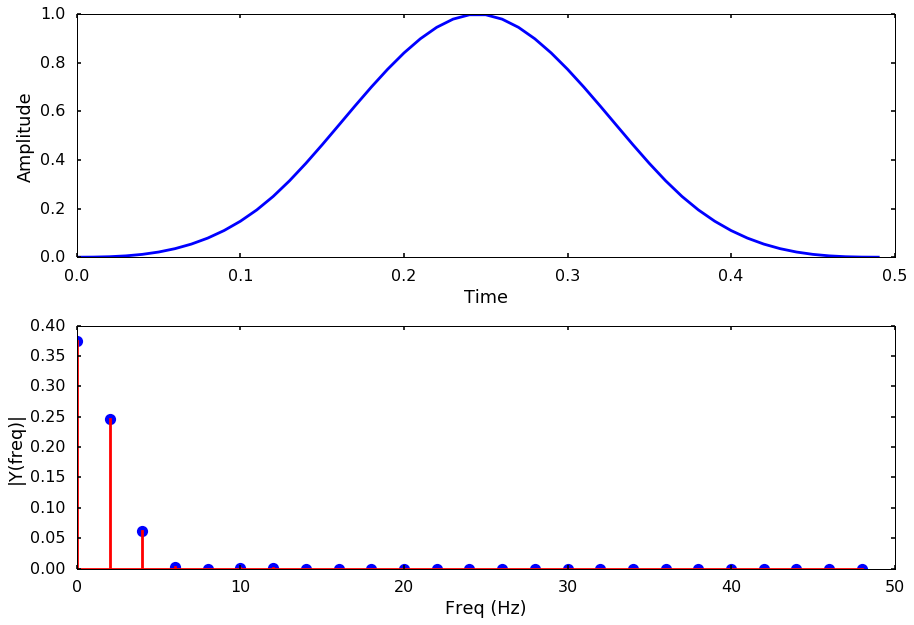

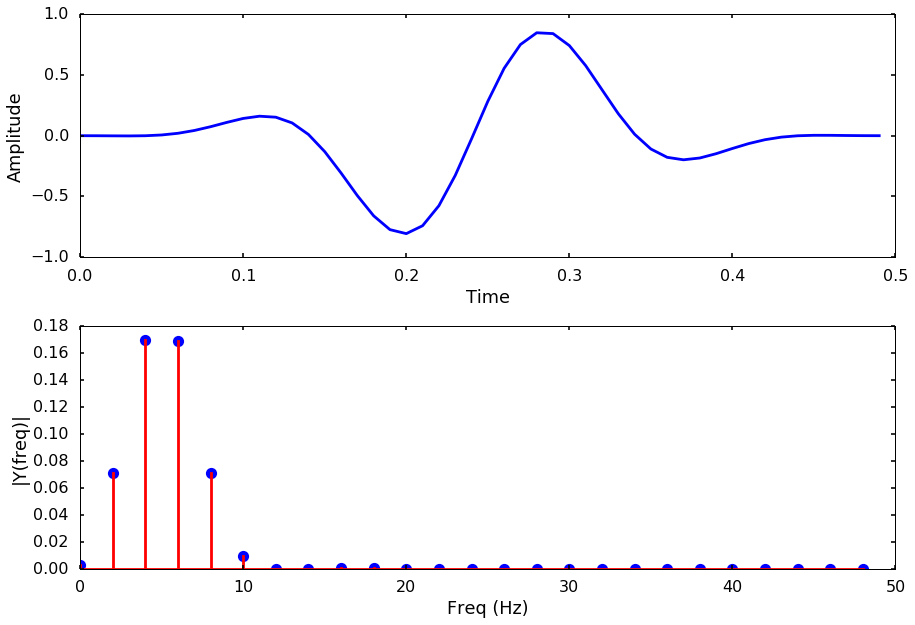

In [11]:
window = signal.parzen(n)
plotSpectrum(t, window,Fs)

y_tapered = window * y 
plotSpectrum(t, y_tapered,Fs)